# A pyROOT example for plotting the distribution of Lepton energies

In order to run this Jupyter Notebook on SLAC machines, fisrt [set up the environment](https://github.com/shawfdong/atlas/blob/master/pyROOT_example.ipynb).

We are going to use the ATLAS dataset, `data16_13TeV.00311481.physics_Main.merge.DAOD_SUSY15.f758_m1616_r8669_p3185_tid11525262_00`, for this example. I've selected the 30 largest files in the dataset, the total size of which is 86.867 GB.

```
| data16_13TeV | DAOD_SUSY15.11525262._000021.pool.root.1 | 2.726 GB
| data16_13TeV | DAOD_SUSY15.11525262._000022.pool.root.1 | 2.655 GB
| data16_13TeV | DAOD_SUSY15.11525262._000023.pool.root.1 | 2.612 GB
| data16_13TeV | DAOD_SUSY15.11525262._000024.pool.root.1 | 2.593 GB
| data16_13TeV | DAOD_SUSY15.11525262._000025.pool.root.1 | 2.731 GB
| data16_13TeV | DAOD_SUSY15.11525262._000029.pool.root.1 | 2.388 GB
| data16_13TeV | DAOD_SUSY15.11525262._000031.pool.root.1 | 2.793 GB
| data16_13TeV | DAOD_SUSY15.11525262._000032.pool.root.1 | 3.012 GB
| data16_13TeV | DAOD_SUSY15.11525262._000033.pool.root.1 | 3.032 GB
| data16_13TeV | DAOD_SUSY15.11525262._000047.pool.root.1 | 3.029 GB
| data16_13TeV | DAOD_SUSY15.11525262._000048.pool.root.1 | 3.149 GB
| data16_13TeV | DAOD_SUSY15.11525262._000049.pool.root.1 | 2.936 GB
| data16_13TeV | DAOD_SUSY15.11525262._000050.pool.root.1 | 3.042 GB
| data16_13TeV | DAOD_SUSY15.11525262._000051.pool.root.1 | 3.092 GB
| data16_13TeV | DAOD_SUSY15.11525262._000052.pool.root.1 | 3.113 GB
| data16_13TeV | DAOD_SUSY15.11525262._000053.pool.root.1 | 3.013 GB
| data16_13TeV | DAOD_SUSY15.11525262._000054.pool.root.1 | 3.242 GB
| data16_13TeV | DAOD_SUSY15.11525262._000055.pool.root.1 | 3.113 GB
| data16_13TeV | DAOD_SUSY15.11525262._000056.pool.root.1 | 2.329 GB
| data16_13TeV | DAOD_SUSY15.11525262._000057.pool.root.1 | 2.454 GB
| data16_13TeV | DAOD_SUSY15.11525262._000058.pool.root.1 | 2.579 GB
| data16_13TeV | DAOD_SUSY15.11525262._000059.pool.root.1 | 3.154 GB
| data16_13TeV | DAOD_SUSY15.11525262._000060.pool.root.1 | 3.079 GB
| data16_13TeV | DAOD_SUSY15.11525262._000061.pool.root.1 | 2.978 GB
| data16_13TeV | DAOD_SUSY15.11525262._000062.pool.root.1 | 3.036 GB
| data16_13TeV | DAOD_SUSY15.11525262._000063.pool.root.1 | 2.975 GB
| data16_13TeV | DAOD_SUSY15.11525262._000064.pool.root.1 | 2.964 GB
| data16_13TeV | DAOD_SUSY15.11525262._000065.pool.root.1 | 2.885 GB
| data16_13TeV | DAOD_SUSY15.11525262._000066.pool.root.1 | 3.058 GB
| data16_13TeV | DAOD_SUSY15.11525262._000067.pool.root.1 | 3.105 GB
```

In [1]:
# Set up ROOT and RootCore
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
# Initialize the xAOD infrastructure
ROOT.xAOD.Init()

<ROOT.xAOD::TReturnCode object at 0x4b6fe50>

xAOD::Init                INFO    Environment initialised for data access


In [3]:
data16_13TeV = ('7f/94/DAOD_SUSY15.11525262._000021.pool.root.1',
                'a9/ff/DAOD_SUSY15.11525262._000022.pool.root.1',
                '8c/4d/DAOD_SUSY15.11525262._000023.pool.root.1',
                'bf/74/DAOD_SUSY15.11525262._000024.pool.root.1',
                '52/00/DAOD_SUSY15.11525262._000025.pool.root.1',
                '38/61/DAOD_SUSY15.11525262._000029.pool.root.1',
                '1c/b8/DAOD_SUSY15.11525262._000031.pool.root.1',
                'f2/26/DAOD_SUSY15.11525262._000032.pool.root.1',
                'd5/7e/DAOD_SUSY15.11525262._000033.pool.root.1',
                '1e/a1/DAOD_SUSY15.11525262._000047.pool.root.1',
                '85/62/DAOD_SUSY15.11525262._000048.pool.root.1',
                'c1/ef/DAOD_SUSY15.11525262._000049.pool.root.1',
                'f2/a4/DAOD_SUSY15.11525262._000050.pool.root.1',
                '00/ac/DAOD_SUSY15.11525262._000051.pool.root.1',
                '62/9d/DAOD_SUSY15.11525262._000052.pool.root.1',
                '48/ac/DAOD_SUSY15.11525262._000053.pool.root.1',
                'a6/c6/DAOD_SUSY15.11525262._000054.pool.root.1',
                '30/71/DAOD_SUSY15.11525262._000055.pool.root.1',
                '5a/a8/DAOD_SUSY15.11525262._000056.pool.root.1',
                '5a/36/DAOD_SUSY15.11525262._000057.pool.root.1',
                'c6/d3/DAOD_SUSY15.11525262._000058.pool.root.1',
                'fa/06/DAOD_SUSY15.11525262._000059.pool.root.1',
                'b1/de/DAOD_SUSY15.11525262._000060.pool.root.1',
                '16/ee/DAOD_SUSY15.11525262._000061.pool.root.1',
                '91/99/DAOD_SUSY15.11525262._000062.pool.root.1',
                '70/72/DAOD_SUSY15.11525262._000063.pool.root.1',
                'f7/0d/DAOD_SUSY15.11525262._000064.pool.root.1',
                'ca/35/DAOD_SUSY15.11525262._000065.pool.root.1',
                '90/3a/DAOD_SUSY15.11525262._000066.pool.root.1',
                'ca/5e/DAOD_SUSY15.11525262._000067.pool.root.1')
rootPath = 'root://atlrdr1//xrootd/atlas/atlaslocalgroupdisk/rucio/data16_13TeV/'

In [4]:
fOut = ROOT.TFile("LeptonEnergy.root", "RECREATE")

# Make histograms for storage
electronEnergy = ROOT.TH1D("electronEnergy", "Electron Energy", 250, 0., 2500.)
muonEnergy = ROOT.TH1D("muonEnergy", "Muon Energy", 250, 0., 2500.)

In [5]:
%%time
treeName = 'CollectionTree'
for daod in data16_13TeV:
    fileName = rootPath + daod
    print( 'Processing file %s ...' % daod )
    f = ROOT.TFile.Open(fileName)
    # Make the "transient tree"
    t = ROOT.xAOD.MakeTransientTree(f, treeName)

    numLeptons = [0, 0]
    totalEnergy = [0., 0.]
    minEnergy = [10000., 10000.]
    maxEnergy = [0., 0.]
    for entry in xrange(t.GetEntries()):
        t.GetEntry(entry)

        for electron in t.Electrons:
            numLeptons[0] += 1
            eGev = electron.e()/1000.
            totalEnergy[0] += eGev
            electronEnergy.Fill( eGev )
            if minEnergy[0] > eGev: 
                minEnergy[0] = eGev
            if maxEnergy[0] < eGev:
                maxEnergy[0] = eGev

        for muon in t.Muons:
            numLeptons[1] += 1
            mGev = muon.e()/1000.
            totalEnergy[1] += mGev
            muonEnergy.Fill( mGev )
            if minEnergy[1] > mGev: 
                minEnergy[1] = mGev
            if maxEnergy[1] < mGev:
                maxEnergy[1] = mGev

    # Print some information
    print('    %d electrons, average min max energy = %f %f %f GeV' %
          (numLeptons[0], totalEnergy[0]/numLeptons[0], minEnergy[0], maxEnergy[0]))
    print('    %d muons, average min max energy = %f %f %f GeV' % 
          (numLeptons[1], totalEnergy[1]/numLeptons[1], minEnergy[1], maxEnergy[1]))
            
    f.Close()

Processing file 7f/94/DAOD_SUSY15.11525262._000021.pool.root.1 ...
    151316 electrons, average min max energy = 61.620515 0.005278 20545.883418 GeV
    147435 muons, average min max energy = 520.143849 0.136594 6763254.318371 GeV
Processing file a9/ff/DAOD_SUSY15.11525262._000022.pool.root.1 ...
    152806 electrons, average min max energy = 60.806956 0.001240 18179.939661 GeV
    142789 muons, average min max energy = 2209.568296 0.119441 225212679.558119 GeV
Processing file 8c/4d/DAOD_SUSY15.11525262._000023.pool.root.1 ...
    151405 electrons, average min max energy = 61.748839 0.006463 32590.750100 GeV
    140977 muons, average min max energy = 515.417632 0.155762 10020976.284824 GeV
Processing file bf/74/DAOD_SUSY15.11525262._000024.pool.root.1 ...
    151896 electrons, average min max energy = 62.496987 0.004230 32958.175966 GeV
    139045 muons, average min max energy = 480.544047 0.130628 6009035.964487 GeV
Processing file 52/00/DAOD_SUSY15.11525262._000025.pool.root.1 ...
 

In [6]:
# Save the output file
fOut.Write()
fOut.Close()

In [7]:
# Read the output file
fOut = ROOT.TFile("LeptonEnergy.root","READ")
electronEnergy = fOut.Get("electronEnergy")
muonEnergy = fOut.Get("muonEnergy")

In [8]:
hs = ROOT.THStack("hs","Stacked Lepton Energy Histograms")
electronEnergy.SetFillColor(ROOT.kBlue)
hs.Add(electronEnergy)
muonEnergy.SetFillColor(ROOT.kGreen)
hs.Add(muonEnergy)

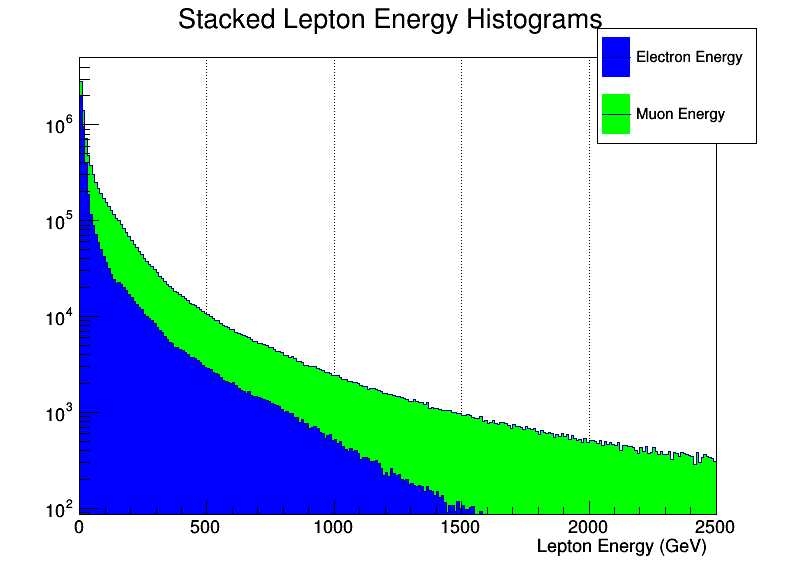

In [9]:
# Display the histogram
# %jsroot on
c = ROOT.TCanvas("Canvas 1","Canvas 1",800,600)
c.SetLogy()
hs.Draw()
hs.GetXaxis().SetTitle("Lepton Energy (GeV)")
ROOT.gPad.SetGrid(1,0)
ROOT.gPad.BuildLegend(0.75,0.75,0.95,0.95,"")
c.Draw()

In [10]:
fOut.Close()